<a href="https://colab.research.google.com/github/gayathrivanaparthy/2216133-aiml-bootcamp/blob/main/Day_5Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset="/content/drive/MyDrive/EmissionsData.csv"
import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df.shape

(14, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


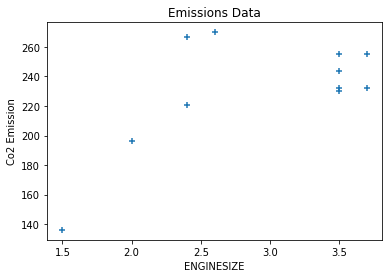

In [ ]:
import matplotlib.pyplot as plt
plt.title("Emissions Data")
plt.xlabel("ENGINESIZE")
plt.ylabel("Co2 Emission")
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,marker='+')

Heat Map

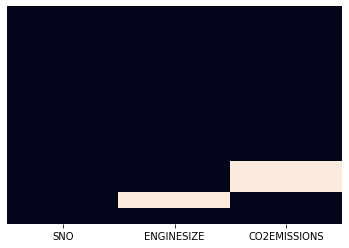

In [ ]:
import seaborn as sb
def get_heat_map(df):
  #plt.figure(figsize=(6,4))
  sb.heatmap(df.isnull(),yticklabels=False, cbar=False)
  return  plt.show()

get_heat_map(df)

In [ ]:
#import math
median_engines=(df.ENGINESIZE.median())
median_engines

3.5

In [ ]:
import math
mean_co2emission=math.floor(df.CO2EMISSIONS.mean())
mean_co2emission

233

In [ ]:
df.ENGINESIZE=df.ENGINESIZE.fillna(median_engines)

In [ ]:
df.CO2EMISSIONS=df.CO2EMISSIONS.fillna(mean_co2emission)

In [ ]:
df

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0
5,5,3.5,230.0
6,6,3.5,232.0
7,7,3.7,232.0
8,8,3.7,255.0
9,9,2.4,267.0


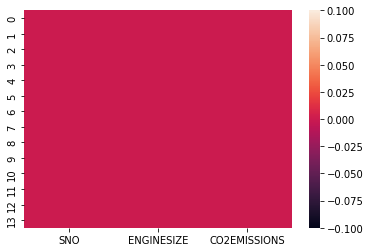

In [ ]:
import seaborn as sb
def get_heat_map(df):
  sb.heatmap(df.isnull())
  return plt.show()

get_heat_map(df)

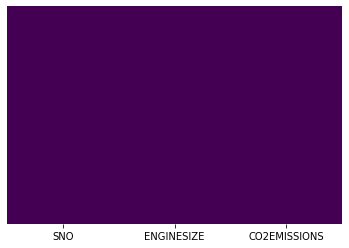

In [ ]:
import seaborn as s
s.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
import numpy as np
x=np.array(df[['ENGINESIZE']])
y=np.array(df[['CO2EMISSIONS']])

In [ ]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3.5],
       [2.6]])

In [ ]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [233.],
       [233.],
       [269.],
       [270.]])

Splitting the Data Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
x_train

array([[2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [3.5]])

In [ ]:
x_test

array([[3.7],
       [3.5],
       [3.5],
       [2.5],
       [1.5],
       [2.6],
       [2.4]])

In [ ]:
y_train

array([[221.],
       [232.],
       [233.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [ ]:
y_test

array([[255.],
       [232.],
       [244.],
       [233.],
       [136.],
       [270.],
       [267.]])

*Training* Model   - Fitting the Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[247.95197439],
       [242.70651014],
       [242.70651014],
       [216.4791889 ],
       [190.25186766],
       [219.10192102],
       [213.85645678]])

In [ ]:
# y_pred.mean()

In [ ]:
y_test

array([[255.],
       [232.],
       [244.],
       [233.],
       [136.],
       [270.],
       [267.]])

In [ ]:
print("Predicting the value for TRAINING data:",model.score(x_train,y_train)*100)

Predicting the value for TRAINING data: 55.81368370485736


In [ ]:
print("Predicting the value for TESTING Data",model.score(x_test,y_test)*100)

Predicting the value for TESTING Data 29.819462526528252


In [ ]:
accuracy=(model.score(x,y)*100)
print(accuracy)

35.23623367609387


In [ ]:
model.coef_

array([[26.22732124]])

In [ ]:
model.intercept_

array([150.91088581])

Visualising Results

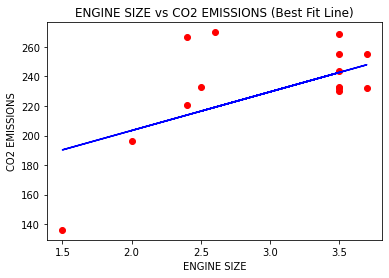

In [ ]:
line=model.coef_*x+model.intercept_

import matplotlib.pyplot as plt
plt.title("ENGINE SIZE vs CO2 EMISSIONS (Best Fit Line)")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.scatter(x,y,color='Red')
plt.plot(x,line,color='Blue')
plt.show()


In [ ]:
y_test

array([[255.],
       [232.],
       [244.],
       [233.],
       [136.],
       [270.],
       [267.]])

In [ ]:
y_pred

array([[247.95197439],
       [242.70651014],
       [242.70651014],
       [216.4791889 ],
       [190.25186766],
       [219.10192102],
       [213.85645678]])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
df

,Actual,Predicted
0,"[[255.0], [232.0], [244.0], [233.0], [136.0], ...","[[247.95197438633937], [242.70651013874067], [..."


In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean square Error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 27.6946180820247
Mean Squared Error: 1256.718587769858
Root Mean square Error: 5.262567632061815
